In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# import function to perform feature selection
from sklearn.feature_selection import RFE

In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import random

In [33]:
train=pd.read_csv('train_s3TEQDk.csv')
test=pd.read_csv('test_mSzZ8RL.csv')

In [34]:
train.shape

(245725, 11)

In [36]:
test.shape

(105312, 10)

In [33]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
#Remove ID
#get dummies Gender
#First let as it and then group it by variable
#Region -Doubt
#Occupation-get dummies
#Channel_Code-get dummies
#Vintage-Doubt
#Credit_Product-get dummies
#Avg_Account_Balance-
#Is_Active-get dummies
#Is_Lead-target variable

In [4]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [40]:
train.Credit_Product.isnull().value_counts()

False    216400
True      29325
Name: Credit_Product, dtype: int64

In [39]:
train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [4]:
print(train['Credit_Product'].value_counts())
print('******************************************')
print(test['Credit_Product'].value_counts())

No     144357
Yes     72043
Name: Credit_Product, dtype: int64
******************************************
No     61608
Yes    31182
Name: Credit_Product, dtype: int64


In [34]:
train['Credit_Product']=train['Credit_Product'].fillna('Yes')
test['Credit_Product']=test['Credit_Product'].fillna('Yes')

In [11]:
train['Age'].describe()

count    245725.000000
mean         43.856307
std          14.828672
min          23.000000
25%          30.000000
50%          43.000000
75%          54.000000
max          85.000000
Name: Age, dtype: float64

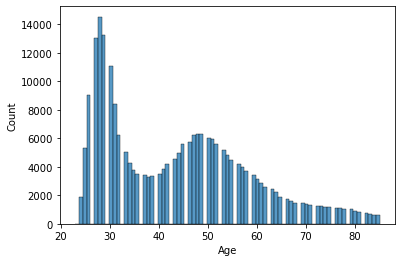

In [12]:
sns.histplot(train['Age'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


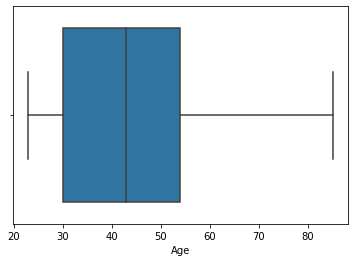

In [10]:
sns.boxplot(train['Age'])
plt.show()

In [35]:
train['AgeCategory']=train['Age'].apply(lambda x: 'Teen' if x<40 else ( 'Mid' if x>=40 and x<=60 else 'Old'))
test['AgeCategory']=test['Age'].apply(lambda x: 'Teen' if x<40 else ( 'Mid' if x>=40 and x<=60 else 'Old'))

In [ ]:
# Credit Product has 11% of missing data

In [37]:
#train.dropna(inplace=True)
#test.dropna(inplace=True)

In [36]:
train['Is_Active']=train['Is_Active'].map({'Yes':1,'No':0,})
test['Is_Active']=test['Is_Active'].map({'Yes':1,'No':0,})

In [37]:
train['Credit_Product']=train['Credit_Product'].map({'Yes':1,'No':0,})
test['Credit_Product']=test['Credit_Product'].map({'Yes':1,'No':0,})

In [38]:
train['Gender']=train['Gender'].map({'Male':1,'Female':0,})
test['Gender']=test['Gender'].map({'Male':1,'Female':0,})

In [39]:
train['Avg_Account_Balance']=np.log(train['Avg_Account_Balance'])
test['Avg_Account_Balance']=np.log(test['Avg_Account_Balance'])

In [133]:
train.Channel_Code.value_counts()

X1    100660
X2     55892
X3     54995
X4      4853
Name: Channel_Code, dtype: int64

In [40]:
le = LabelEncoder()
train['Region_Code'] = le.fit_transform(train['Region_Code'])
test['Region_Code'] = le.fit_transform(test['Region_Code'])

In [41]:
train.drop(['ID','Age'],axis=1,inplace=True)
test.drop(['ID','Age'],axis=1,inplace=True)

In [42]:
train.drop('Region_Code',axis=1,inplace=True)
test.drop('Region_Code',axis=1,inplace=True)

In [43]:
train_cat = train.select_dtypes(include='object')
test_car = test.select_dtypes(include='object')

In [44]:
train_num = train.select_dtypes(exclude='object')
test_num = test.select_dtypes(exclude='object')

In [45]:
train_dummy = pd.get_dummies(data = train_cat, drop_first = True)

In [46]:
test_dummy = pd.get_dummies(data = test_car, drop_first = True)

In [32]:
train.head()

,Gender,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,AgeCategory
0,0,Other,X3,43,0,13.860193,NaN,0,Old
1,0,Salaried,X1,32,0,13.274205,NaN,0,Teen
2,0,Self_Employed,X3,26,0,14.210464,NaN,0,Mid
3,1,Salaried,X1,19,0,13.061453,NaN,0,Teen
4,0,Salaried,X1,33,0,13.695360,NaN,0,Teen


In [171]:
train.dtypes

Gender                   int64
Age                      int64
Region_Code              int32
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product           int64
Avg_Account_Balance    float64
Is_Active                int64
Is_Lead                  int64
dtype: object

In [47]:
train_feature=pd.concat([train_num, train_dummy], axis = 1)
test_feature=pd.concat([test_num, test_dummy ], axis = 1)

In [48]:
train_feature.head()

,Gender,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,AgeCategory_Old,AgeCategory_Teen
0,0,43,0,13.860193,0,0,1,0,0,0,1,0,1,0
1,0,32,0,13.274205,0,0,0,1,0,0,0,0,0,1
2,0,26,0,14.210464,1,0,0,0,1,0,1,0,0,0
3,1,19,0,13.061453,0,0,0,1,0,0,0,0,0,1
4,0,33,0,13.695360,0,0,0,1,0,0,0,0,0,1


In [49]:
X=train_feature.drop('Is_Lead',axis=1)

In [50]:
y=train_feature['Is_Lead']

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [ ]:
#Logistic Regression

In [52]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_train = logreg.predict(x_test)

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score 0.8092379692745956
[[33667  5777]
 [ 3598  6103]]
Precision : 0.5137205387205387
Recall : 0.6291104009895887
Specificity : 0.8535391948078288
F1 Score : 0.5655901024048932
Accuracy : 0.8092379692745956
kappa value: 0.44496687658994294


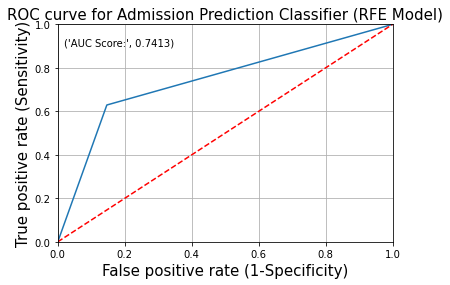

In [53]:
print('Accuracy Score',metrics.accuracy_score(y_pred_train,y_test))
cm = metrics.confusion_matrix(y_pred_train, y_test)
print(cm)
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
precision = TP / (TP+FP)
print('Precision :',precision)
recall = TP / (TP+FN)
print('Recall :',recall)
specificity = TN / (TN+FP)
print('Specificity :',specificity)
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 Score :',f1_score)
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy :',accuracy)
fpr, tpr, thresholds = roc_curve(y_pred_train, y_test)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_pred_train, y_test),4)))
plt.grid(True)
kappa = cohen_kappa_score(y_pred_train, y_test)
print('kappa value:',kappa)

In [ ]:
#Ada boost Classifier

In [54]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(x_train, y_train)
y_pred_ada = ada_model.predict(x_test)
print("The Accuracy is: ", round(accuracy_score(y_test, y_pred_ada), 4))

The Accuracy is:  0.8114


In [ ]:
#XGB Classifier

In [24]:
tuned_paramaters = [{'n_estimators': [100],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2],
                     'max_depth': [2, 3, 4, 5, 6]}]

In [ ]:
xgb_model = XGBClassifier(random_state = 8, n_jobs=-1)
xgb_grid = GridSearchCV(estimator = xgb_model,param_grid=tuned_paramaters,cv = 5,n_jobs=-1)
xgb_grid.fit(x_train, y_train)
y_pred_xgb = xgb_grid.predict(x_test)
print(classification_report(y_test, y_pred_xgb))

In [55]:
#Stacking classifier

base_learners = [('Decision Tree', DecisionTreeClassifier()),
                 ('Random Forest', RandomForestClassifier())]
stack_model_AdaBoost = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier(random_state = 8))
stack_model_AdaBoost.fit(x_train, y_train)

StackingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Random Forest', RandomForestClassifier())],
                   final_estimator=AdaBoostClassifier(random_state=8))

In [56]:
y_pred_prob = stack_model_AdaBoost.predict_proba(x_test)[:, 1]

print('AUC score for the model with AdaBoost as final estimator:', roc_auc_score(y_test, y_pred_prob))

AUC score for the model with AdaBoost as final estimator: 0.7949764054517174


In [28]:
test_feature.head()

,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,29,4,25,1,13.517598,0,1,0,0,0,0,0
2,1,31,20,14,0,12.282798,0,0,1,0,0,0,0
3,1,29,22,33,0,13.674028,0,1,0,0,0,0,0
4,0,29,20,19,0,13.395572,0,1,0,0,0,0,0
5,1,60,18,110,0,15.346827,0,0,0,1,0,1,0


In [93]:
train['Age'].describe()

count    245725.000000
mean         43.856307
std          14.828672
min          23.000000
25%          30.000000
50%          43.000000
75%          54.000000
max          85.000000
Name: Age, dtype: float64

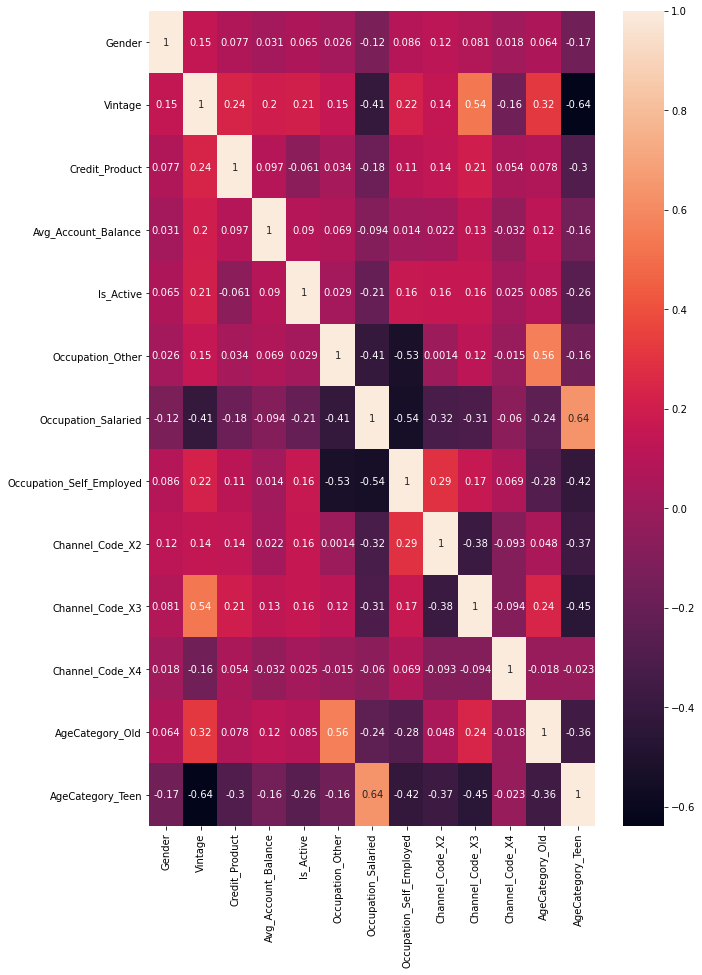

In [57]:
plt.figure(figsize=(10,15))
sns.heatmap(x_train.corr(),annot=True)
plt.show()

In [58]:
submission = pd.read_csv('sample_submission_eyYijxG.csv')
final_predictions = stack_model_AdaBoost.predict_proba(test_feature)[:, 1]
submission['Is_Lead'] = final_predictions

In [59]:
submission.to_csv('sample_submission_eyYijxG.csv', index=False)

In [60]:
submission.head()

,ID,Is_Lead
0,VBENBARO,0.491478
1,CCMEWNKY,0.501348
2,VK3KGA9M,0.497177
3,TT8RPZVC,0.485908
4,SHQZEYTZ,0.485908
